# ОПИСАНИЕ ПРОЕКТА #

## Анализ данных АВ-теста, проведенного в крупном интернет-магазине ##

Задача данного проекта - приоритизировать гипотезы для увеличения выручки крупного интернет-магазина, подготовленные совместно с отделом маркетинга. Для приоритизации гипотез будут применены фреймфорки ICE и RICE (с изучением и рассмотрением изменений   при применении RICE вместо ICE). Также будут и проанализированы результаты A/B-теста: мы проанализируем, как ведут себя группа А и группа В, к которой применили тестируемую гипотезу, как и на какие показатели повлияла данная гипотеза (в жданном случае мы рассматриваем среднее количество заказов на пользователя и средний чек), привело ли изменение к положительной динамике и росту выручки, как и чем закончить тестирование.  

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import datetime as dt
#from datetime import date, datetime as dt
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Загрузим необходимые датасеты
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')

In [ ]:
# определим функцию для описания и проверки датасетов
def data_review (data):
    print('Первые 10 строк:')
    display(data.head(10))
    print('Последние 10 строк:')
    display(data.tail(10))
    print('ТИПЫ ДАННЫХ\n')
    display(data.info())
#    print('СТАТИСТИЧЕСКАЯ СВОДКА')
#   display(data.describe()) - строка в данном проекте не нужна
    print('ПРОПУСКИ\n')

    for element in data.columns:
        if data[element].isna().sum() > 0:
            print(element, ' - ', data[element].isna().sum(), 'пропусков')
            count = +1
        else: print('Пропусков НЕТ\n')
    print('\nПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('\nДУБЛИКАТЫ\n')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

In [ ]:
data_review (hypothesis)

Первые 10 строк:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Последние 10 строк:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

ПРОПУСКИ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


Проверка датасета hypothesis показывает, что в нем 9 строк (по количеству гипотез), пропусков и дубликатов нет. Изменим только названия колонок на нижний регистр

In [ ]:
hypothesis.columns = map(str.lower, hypothesis.columns)
pd.options.display.max_colwidth = 100
print (hypothesis)

                                                                                            hypothesis  \
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
8                                             

## ЧАСТЬ 1. Приоритизация гипотез ##

Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

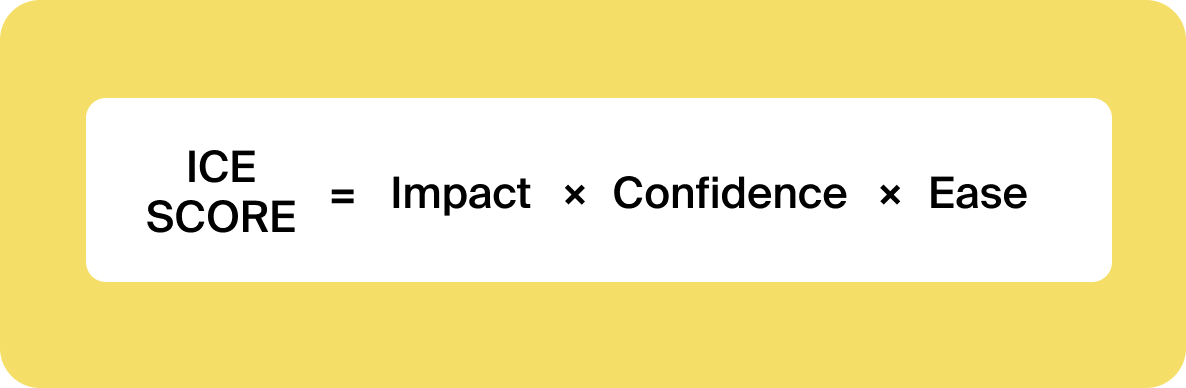

In [ ]:
hypothesis['ICE']=round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'], 2)
print (hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

Применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

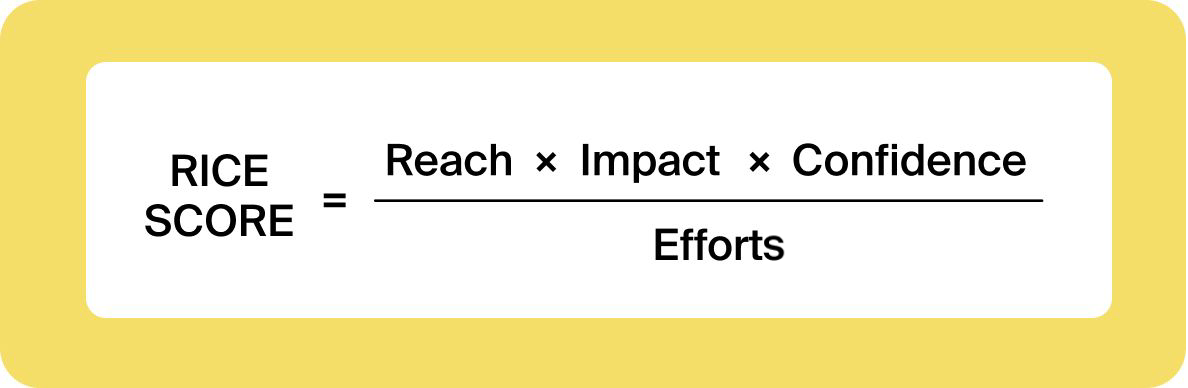

In [ ]:
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
print (hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

In [ ]:
print (hypothesis.loc[3,'hypothesis'])  #вспомогательная строка, чтобы иметь под рукой полное название гипотезы

Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар


Как изменилась приоритизация гипотез при применении RICE вместо ICE: гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  переместилась с 3го места на 1е из-за того, что компонент охвата Reach у данной гипотезы равен 10. Такая же ситуация у гипотезы" Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (Reach = 8). При этом высокий параметр охвата не сильно приоритизировал гипотезу "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар", т.к. по ней компонент затратности Effort высок и нивелирует компонент охвата в отношении привлекательности гипотезы.  

## ЧАСТЬ 2. Анализ А/В-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача - проанализировать A/B-тест:

In [ ]:
data_review (orders)

Первые 10 строк:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


Последние 10 строк:


,transactionId,visitorId,date,revenue,group
1187,2274188238,132143192,2019-08-14,750,A
1188,1692103379,1022829655,2019-08-14,112,A
1189,4082620617,393266494,2019-08-14,31550,B
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

ПРОПУСКИ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


In [ ]:
data_review (visitors)

Первые 10 строк:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


Последние 10 строк:


,date,group,visitors
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


ТИПЫ ДАННЫХ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

ПРОПУСКИ

Пропусков НЕТ

Пропусков НЕТ

Пропусков НЕТ


ПРОЦЕНТ ПРОПУСКОВ ИЗ ВСЕГО ДАТАСЕТА


date        0.0
group       0.0
visitors    0.0
dtype: float64


ДУБЛИКАТЫ

Дубликатов НЕТ


В датасете orders 1197 записей, пропусков и дубликатов нет. Изменим названия колонок на нижний регистр в "змеином стиле" и изменим тип данных колонки date на правильный

In [ ]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [ ]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

В датасете visitors 62 записи, пропусков и дубликатов нет. Изменим названия колонок на нижний регистр в "змеином стиле" и изменим тип данных колонки date на правильный

1.	Построим график кумулятивной выручки по группам. Сделайте выводы и предположения.

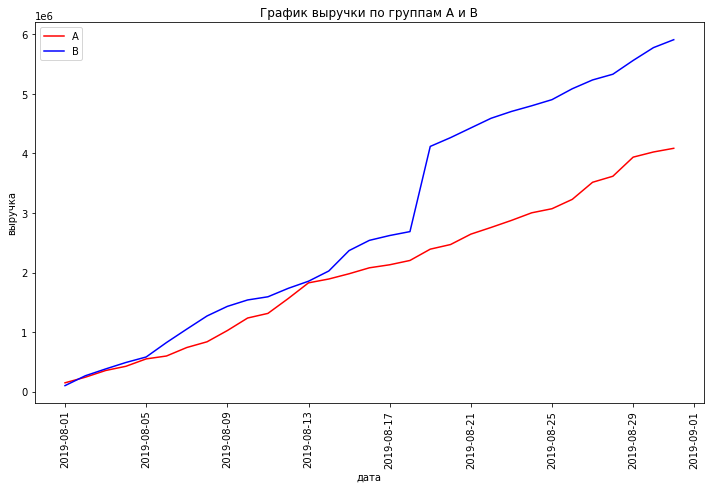

In [ ]:
datesGroups = orders [['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {   'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({    'date': 'max',
               'group': 'max',
               'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeData.head(5)

import matplotlib.pyplot as plt


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color='red') # Строим график выручки группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color='blue') # Строим график выручки группы B
plt.title('График выручки по группам А и В')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('выручка')
plt.legend()

Вывод: Выручка по группе А почти равномерно увеличивается в течение всего теста, выручка по группе В также растет достаточно равномерно, но имеет резкий всплеск, это может свидетельствовать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

2.	Построим график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

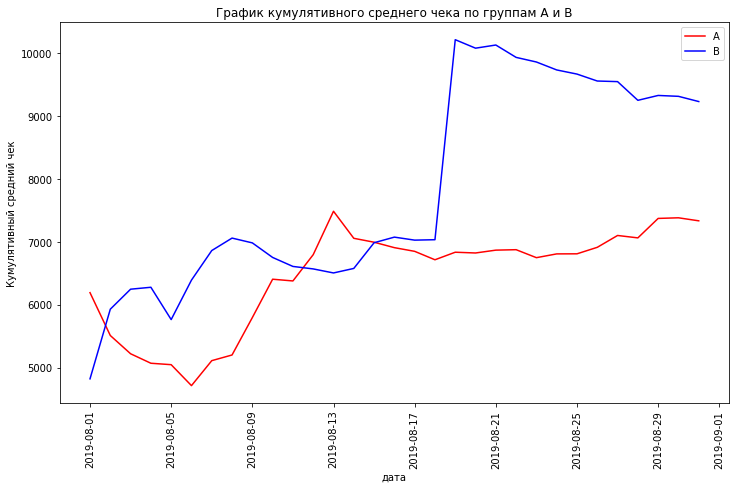

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color='red')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color='blue')
plt.title('График кумулятивного среднего чека по группам А и В')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('Кумулятивный средний чек')
plt.legend()

<b> ВЫВОД <b> На первой половине графике средние чеки в среднем равномерны, а ближе к концу теста график А установился на одном уровне около 7000, а график по группе В показывает резкий скачок и с небольшим падением остается на уровне около 9000. Даже если были крупные заказы, то установление на более высоком уровне говорит, о лучших показателях в группе В после 18.08.2019.

3.	Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

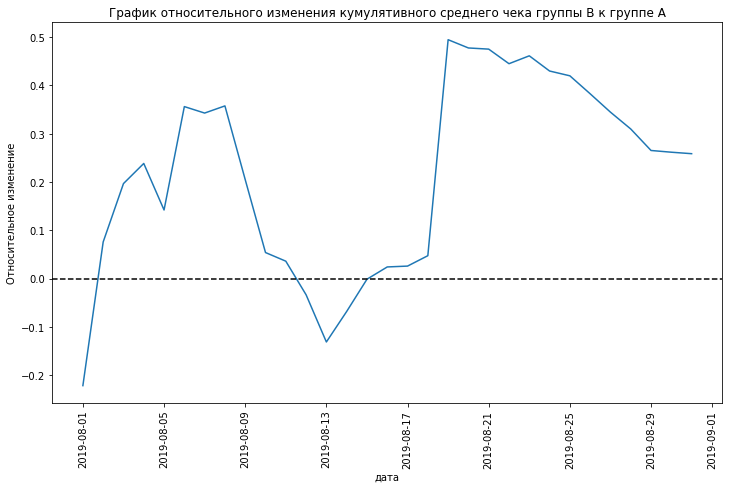

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('Относительное изменение')

plt.axhline(y=0, color='black', linestyle='--') # добавляем ось X

<b> ВЫВОД <b> В нескольких точках график различия между сегментами резко «скачет». Это может быть обусловлено крупными заказами и выбросами. В целом же график отражает преимущество кумулятивного среднего чека группы В.

4.	Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.


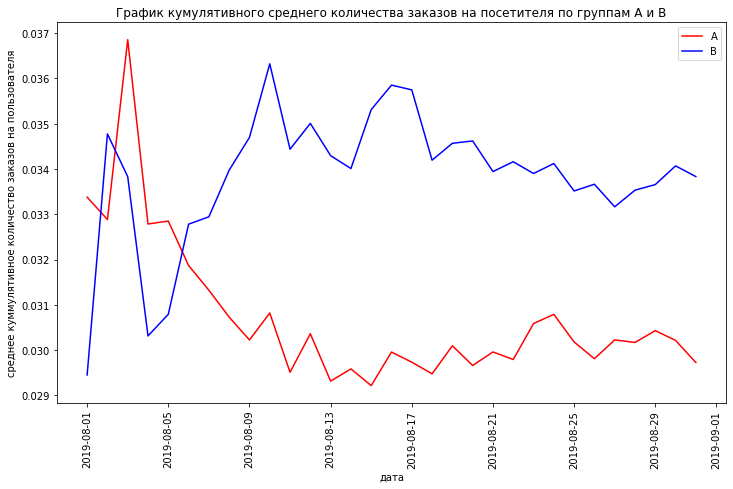

In [ ]:
# считаем среднее количество заказов на посетителя
cumulativeData['avg_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders'], label='A', color='red')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders'], label='B', color='blue')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам А и В')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('среднее куммулятивное количество заказов на пользователя')
plt.legend()

# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-09-01', 0, 0.015])

<b> Вывод <b> Графики среднего количество заказов на клиента в первые пять дней наблюдений скачут, затем показатели группы В устанавливаются на более высоком уровне

5.	Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

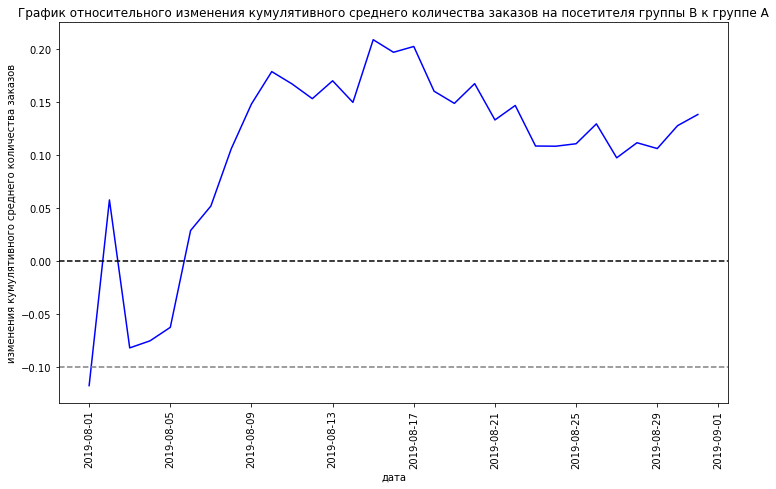

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','avg_orders']].merge(cumulativeDataB[['date','avg_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,7))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['avg_ordersB']/mergedCumulativeConversions['avg_ordersA']-1,
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A",
        color='blue')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('изменения кумулятивного среднего количества заказов')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

<b> ВЫВОД <b> В начале теста преимущество "скакало" между группами, но затем группа В вырвалась вперёд и постепенно растёт.
В целом отношение среднего количества заказов на посетителя установилось в пользу группы В, но  делать какие-либо выводы по тесту без очистки данных нельзя, возможно, они изменят картину.

6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Text(0, 0.5, 'заказы')

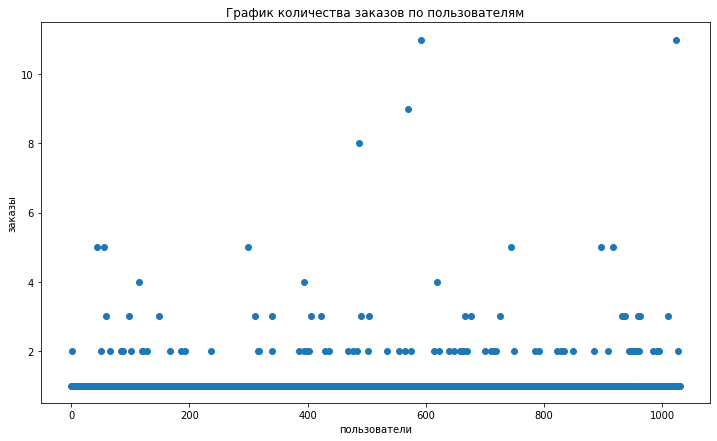

In [ ]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['user_id', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,7))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('заказы')

7.	Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [ ]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Возьмем за границу нормальных заказов 95й персентиль - 2 заказа.

8.	Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

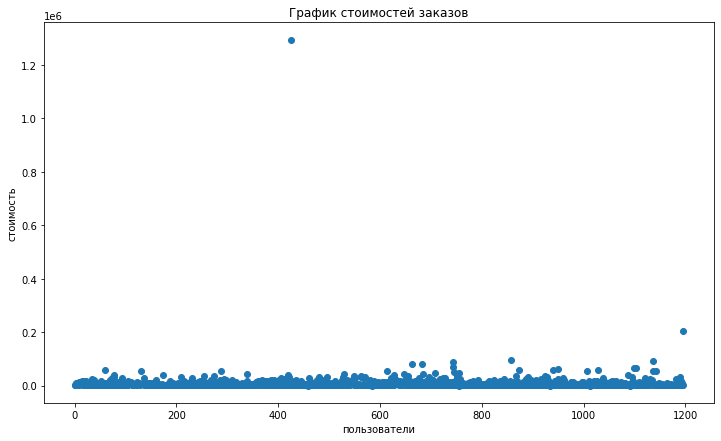

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,7))
plt.title('График стоимостей заказов')
plt.xlabel('пользователи')
plt.ylabel('стоимость')
plt.scatter(x_values, orders['revenue'])

9.	Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [ ]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформляли заказы на сумму более 28 000. И 1% пользователей заказывали на сумму более 58 233.

В качестве порога примем значение 95го персентиля - 28000

10.	Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.  
Напараметрический тест Уилкоксона-Манна-Уитни используем  для расчета р-value, , так как у нас имеются выбросы, а сам тест работает с рангами, не учитывая сами значения. Так же сформируем нулевую и альтернативную гипотезы. Нулевая гипотеза говорит о том, что статистическая значимость в количестве заказов и среднем чеке не значительна и сделать вывод о различии нельзя, альтернативная гипотеза говорит о том, что статистическая значимость в количестве заказов и среднемк чеке значитаельная и между выборками имеется статистическая значимость. Порогом статистической значимости установим alpha=.05

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

<b>ВЫВОД<b> P-value значительно меньше 0.05, значит стоит отвергнуть нулевую гипотезу. Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов группы В к группе А равен 13.8%.

11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [ ]:
print('P-value: ', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value:  0.729
Относительные различия: 0.259


<b>ВЫВОД<b> P-value значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%. Уберем аномалии и посчитаем те же метрики.

12.	Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('P-value: ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value:  0.013
Относительные различия: 0.173


<b>ВЫВОД<b> P-value  больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 17.3%.

13.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [ ]:
print('P-value: '
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738
Относительные различия: -0.020


<b> ВЫВОД <b> Появилась статистически значимость различия среднего чека заказов между группами, что говорит о том, что после удаления выбросов в данных меньше шумов, дисперсия снизилась, и различие стало статистически значимым

14.	Принятие решения по результатам теста и объяснение его. Варианты решений:   
- Остановить тест, зафиксировать победу одной из групп.  
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

<b> Вариант решения: остановить тест, признать победу группы В.  
<b>
    
Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий, это говорит о том, что  изменение, примененное к группе В, увеличивает конверсию пользователей, результаты группы имеют тенденцию к росту, либо зафиксировались около среднего значения.
По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после удаления выбросов.
График различия среднего чека колеблется: он и позволил вам найти аномалии.
Ситуация, когда увеличение , количества покупателей (заказов) растет, а средний чек не уменьшается говорит об успешности экспериментальной группы.


## ОБЩИЙ ВЫВОД ##

Анализ данных и графиков AB-теста позволяют сделать следующие выводы:  
- выручка по группе А почти равномерно увеличивается в течение всего теста, выручка по группе В также растет достаточно равномерно, но имеет резкий всплеск, это может свидетельствовать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.
- На первой половине графика средних чеков группы в среднем равномерны, а ближе к концу теста график А установился на одном уровне около 7000, а график по группе В показывает резкий скачок и с небольшим падением остается на уровне около 9000. Даже если были крупные заказы, то установление на более высоком уровне говорит, о лучших показателях в группе В после 18.08.2019.  
- График кумулятивного среднего чека в нескольких точках отражает различия между сегментами, резко «скачет». Это может быть обусловлено крупными заказами и выбросами. В целом же график отражает преимущество кумулятивного среднего чека группы В.
- Графики среднего количество заказов на клиента в первые пять дней наблюдений скачут, затем показатели группы В устанавливаются на более высоком уровне
- График кумулятивного среднего заказа показывает, что в начале теста преимущество "скакало" между группами, но затем группа В вырвалась вперёд и постепенно растёт, но окончательный вывод по данному графику мы не делаем, т.к. необходимо оценить данные без аномалий.
- по точечным графикам и расчетам персентилей определяем, что уровень аномальной выручки - более 28000, а среднее количество заказов (95 персентиль) - не более 2.
-  Анализ "сырых данных" сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего количества заказов группы В к группе А равен 13.8%. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным значительно больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 26%.
- После очистки данных P-value больше 0.05, статистически значимых отличий в среднем чеке между группами нет. Относительное различие между чеками около 17.3%. Появилась статистически значимость различия среднего чека заказов между группами, что говорит о том, что после удаления выбросов в данных меньше шумов, дисперсия снизилась, и различие стало статистически значимым  

В итоге мы можем остановить тест и признать победу группы В.

Есть статистически значимое различие по количеству заказов на пользователя между группами как по сырым данным, так и после фильтрации аномалий, это говорит о том, что изменение, примененное к группе В, увеличивает заинтересованность пользователей и количество заказов, результаты группы имеют тенденцию к росту, либо зафиксировались около среднего значения. По сырым данным нет статистически значимого различия по среднему чеку между группами, как и после удаления выбросов. График различия среднего чека колеблется: он и позволил вам найти аномалии. Ситуация, когда увеличение , количества покупателей (заказов) растет, а средний чек не уменьшается говорит об успешности экспериментальной группы.